In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
calib_file = '/exports/csce/datastore/geos/groups/LSDTopoData/FORESEE/Data/Calibration/Calibrated_FoS_depth.csv'
calib = pd.read_csv(calib_file)

In [3]:
valid_file = "./Validated_updated_FoS_depth.csv"
valid = pd.read_csv(valid_file)

### All precipitation timeseries - length 1826 - early peak 

In [130]:
all_precip_early_file = './Validated_updated_FoS_depth_all_days_early.csv'
all_precip_early = pd.read_csv(all_precip_early_file)

In [131]:
non_zero_indexes_all = all_precip_early.index[all_precip_early['factor_of_safety'] != 0].tolist()

In [ ]:
non_zero_indexes_all[:20]

In [31]:
# plot the points which are non-zero with the ones that are 
#all_precip_early_non_zero = all_precip_early.iloc[non_zero_indexes_all]


In [132]:
all_precip_early['is_it_failure'] = np.where(all_precip_early['time_of_failure']!= 0, True, False)

In [124]:
#all_precip_early['time_of_failure'] = all_precip_early['time_of_failure']/86400
all_precip_early['time_of_failure'] = all_precip_early['time_of_failure'].apply(lambda x: x/86400)


In [134]:
true_failures=all_precip_early.loc[all_precip_early['is_it_failure'] == True]


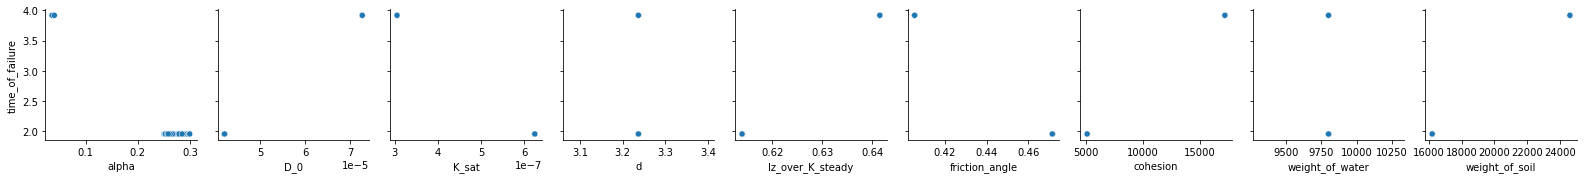

In [127]:
x_vars = ['alpha','D_0', 'K_sat', 'd', 'Iz_over_K_steady', 'friction_angle', 'cohesion', 'weight_of_water', 'weight_of_soil']
y_vars = ['time_of_failure']
g = sns.PairGrid(true_failures, hue="is_it_failure", x_vars=x_vars, y_vars=y_vars)
g = g.map(sns.scatterplot)


### Short precipitation timeseries - length 100 - early peak 

In [38]:
short_precip_early_file = './early_Validated_updated_FoS_depth_100.csv'
short_precip_early = pd.read_csv(short_precip_early_file)

In [39]:
non_zero_indexes_short = short_precip_early.index[short_precip_early['factor_of_safety'] != 0].tolist()

In [ ]:
non_zero_indexes_short[:20]

In [40]:
early_precip_early_non_zero = short_precip_early.iloc[non_zero_indexes_short]


In [ ]:
early_precip_early_non_zero.head(10)

### Short Precipitation Timeseries - length 100, late peak 

In [20]:
short_precip_late_file = './late_Validated_updated_FoS_depth_100.csv'
short_precip_late = pd.read_csv(short_precip_late_file)

In [21]:
non_zero_indexes_short = short_precip_late.index[short_precip_late['factor_of_safety'] != 0].tolist()

In [ ]:
non_zero_indexes_short[:20]

### Short Precipitation Timeseries - length 100 - all values 0.001

In [14]:
short_precip_early_file_001 = './early_Validated_updated_FoS_depth_100_0.001.csv'
short_precip_early_001 = pd.read_csv(short_precip_early_file_001)

In [15]:
non_zero_indexes_short_001 = short_precip_early_001.index[short_precip_early_001['factor_of_safety'] != 0].tolist()

In [ ]:
non_zero_indexes_short_001[:30]

### Short Precipitation Timeseries - lenth 100 - all values 0

In [23]:
short_precip_early_file_0 = './early_Validated_updated_FoS_depth_100_0.csv'
short_precip_early_0 = pd.read_csv(short_precip_early_file_0)

In [24]:
non_zero_indexes_short_0 = short_precip_early_0.index[short_precip_early_0['factor_of_safety'] != 0].tolist()

In [25]:
non_zero_indexes_short_0[:30]

[]

In [62]:
### Plotting the data with highlights of the points that fail early
#failures_file = "/exports/csce/datastore/geos/groups/LSDTopoData/FORESEE/Data/Calibration/Validated_updated_FoS_depth.csv"

valid_all_file = '/exports/csce/datastore/geos/groups/LSDTopoData/FORESEE/Data/Calibration/Validated_updated_FoS_depth.csv'
valid_all = pd.read_csv(valid_all_file)

<AxesSubplot:xlabel='time_of_failure', ylabel='K_sat'>

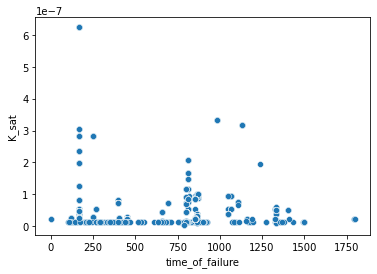

In [63]:
sns.scatterplot(valid_all['time_of_failure']/86400, valid_all['K_sat'])

<AxesSubplot:xlabel='time_of_failure', ylabel='Count'>

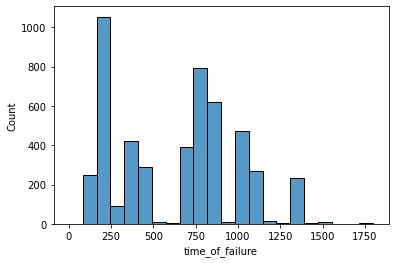

In [64]:
sns.histplot(valid_all['time_of_failure']/86400)

In [ ]:
g = sns.PairGrid(valid_all)
g.map(sns.scatterplot)

In [46]:
valid_all.columns

Index(['alpha', 'D_0', 'K_sat', 'd', 'Iz_over_K_steady', 'friction_angle',
       'cohesion', 'weight_of_water', 'weight_of_soil', 'time_of_failure',
       'factor_of_safety', 'min_depth', 'S', 'Z', 'row', 'col',
       'observed_failtime'],
      dtype='object')

In [69]:
valid_all['is_it_failure'] = np.where(valid_all['time_of_failure']!= 0, False, True)

In [73]:
valid_all.head(2)

,alpha,D_0,K_sat,d,Iz_over_K_steady,friction_angle,cohesion,weight_of_water,weight_of_soil,time_of_failure,factor_of_safety,min_depth,S,Z,row,col,observed_failtime,is_it_failure
0,0.050537,0.000005,2.210798e-08,3.236842,0.241674,0.20019,12116.307194,9800.851942,16740.399761,100224000.0,-0.557541,0.1,0.050537,652.631226,4.0,690.0,16588800.0,False
1,0.058243,0.000005,2.210798e-08,3.236842,0.241674,0.20019,12116.307194,9800.851942,16740.399761,100224000.0,-0.467392,0.1,0.058243,655.851807,5.0,687.0,87091200.0,False


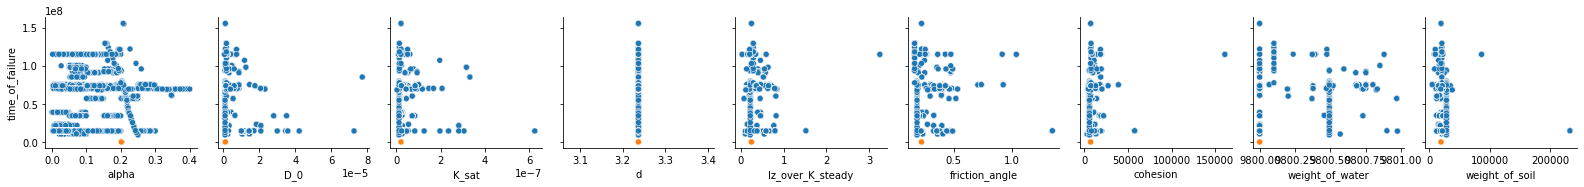

In [85]:
x_vars = ['alpha','D_0', 'K_sat', 'd', 'Iz_over_K_steady', 'friction_angle', 'cohesion', 'weight_of_water', 'weight_of_soil']
y_vars = ['time_of_failure']
g = sns.PairGrid(valid_all, hue="is_it_failure", x_vars=x_vars, y_vars=y_vars)
g = g.map(sns.scatterplot)


In [ ]:
valid_all['is_it_failure'] = np.where(valid_all['time_of_failure']!= 0, False, True)

In [91]:
is_it_failure_col = valid_all['is_it_failure']

In [94]:
valid_all

,alpha,D_0,K_sat,d,Iz_over_K_steady,friction_angle,cohesion,weight_of_water,weight_of_soil,time_of_failure,factor_of_safety,min_depth,S,Z,row,col,observed_failtime,is_it_failure
0,0.050537,0.000005,2.210798e-08,3.236842,0.241674,0.200190,12116.307194,9800.851942,16740.399761,100224000.0,-0.557541,0.1,0.050537,652.631226,4.0,690.0,16588800.0,False
1,0.058243,0.000005,2.210798e-08,3.236842,0.241674,0.200190,12116.307194,9800.851942,16740.399761,100224000.0,-0.467392,0.1,0.058243,655.851807,5.0,687.0,87091200.0,False
2,0.034425,0.000015,8.699790e-08,3.236842,0.136849,0.291813,17356.145740,9800.000000,18178.947821,75254400.0,-2.775330,0.1,0.034425,684.327332,14.0,770.0,91756800.0,False
3,0.079407,0.000005,2.210798e-08,3.236842,0.241674,0.200190,12116.307194,9800.851942,16740.399761,100224000.0,-0.295952,0.1,0.079407,711.506897,15.0,804.0,27993600.0,False
4,0.044569,0.000015,8.699790e-08,3.236842,0.136849,0.291813,17356.145740,9800.000000,18178.947821,75254400.0,-2.111099,0.1,0.044569,687.526672,17.0,773.0,112492800.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4937,0.243946,0.000001,2.149675e-08,3.236842,0.246799,0.221389,7067.186369,9800.000000,19368.341169,103075200.0,0.999785,2.9,0.243946,810.950928,976.0,799.0,50803200.0,False
4938,0.073854,0.000004,4.431243e-08,3.236842,0.435884,0.532896,20112.726202,9800.196805,18900.605034,69379200.0,-0.125992,0.1,0.073854,854.721130,976.0,862.0,12441600.0,False
4939,0.139343,0.000001,2.339143e-08,3.236842,0.360760,0.427434,7282.911614,9800.687419,21484.216845,73699200.0,0.861078,0.1,0.139343,829.709045,976.0,880.0,74131200.0,False
4940,0.052558,0.000004,4.431243e-08,3.236842,0.435884,0.532896,20112.726202,9800.196805,18900.605034,69379200.0,-0.088257,0.1,0.052558,845.346313,977.0,875.0,41472000.0,False
